In [280]:
# 09/01/2025
# https://scikit-learn.org/stable/

In [281]:
from sklearn.cluster import k_means
from sklearn.datasets import load_iris
from sklearn import datasets

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [282]:
x, y = datasets.load_iris(as_frame=True, return_X_y=True)

In [283]:
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [284]:
x.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [285]:
x = x[['sepal length (cm)', 'sepal width (cm)']]
x.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


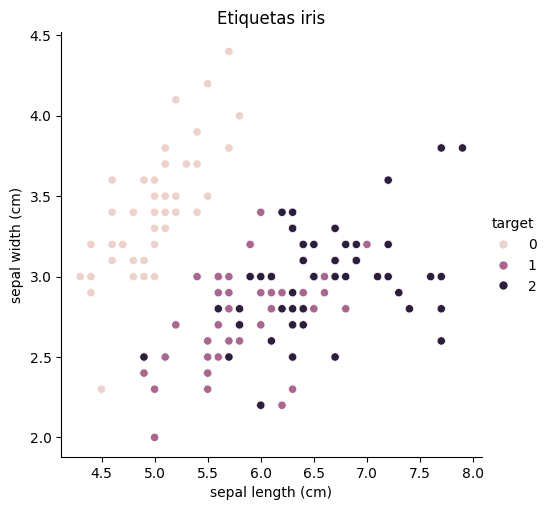

In [286]:
sns.relplot(x, x = 'sepal length (cm)', y = 'sepal width (cm)',hue = y).set(title="Etiquetas iris")

Aplicamos el algoritmo

In [287]:
# la inercia es un concepto matemático que nos dice cómo de estable es la solución que se ha alcanzado
centroid, labels, inertia = k_means(x, 3, random_state=0)

In [288]:
len(labels), len(centroid), inertia

(150, 3, 37.0507021276596)

In [289]:
centroid

array([[5.77358491, 2.69245283],
       [6.81276596, 3.07446809],
       [5.006     , 3.428     ]])

In [290]:
# Las x del array centroides
centroid[:, 0]

array([5.77358491, 6.81276596, 5.006     ])

Las etiquetas no coinciden con las de iris, podemos hacer un gŕafico para identificar los grupos

---



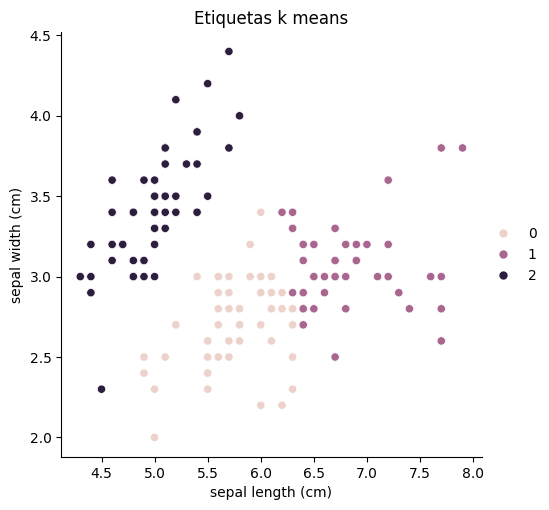

In [291]:
sns.relplot(x, x = 'sepal length (cm)', y = 'sepal width (cm)', hue = labels).set(title="Etiquetas k means")

[Text(0.5, 1.0, 'Etiquetas k means')]

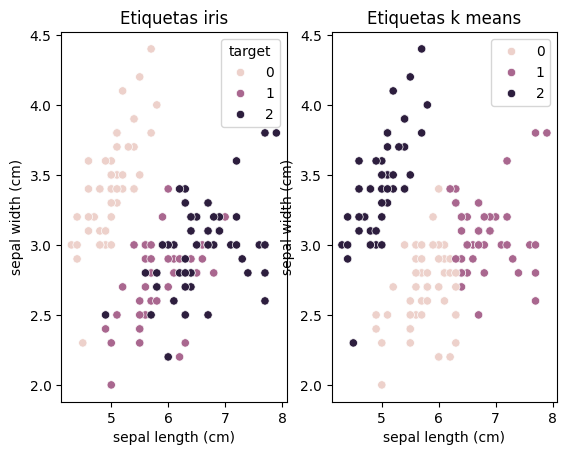

In [292]:
fig, axes = plt.subplots(1, 2)
sns.scatterplot(x, x = 'sepal length (cm)', y = 'sepal width (cm)', hue = y, ax=axes[0]).set(title="Etiquetas iris")
sns.scatterplot(x, x = 'sepal length (cm)', y = 'sepal width (cm)', hue = labels, ax=axes[1]).set(title="Etiquetas k means")

Comparando, creamos labels2 para que cuadren

In [293]:
cambiar = [1, 2, 0]
labels2 =  [cambiar[x] for x in labels]

<Axes: title={'center': 'Etiquetas k means'}, xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

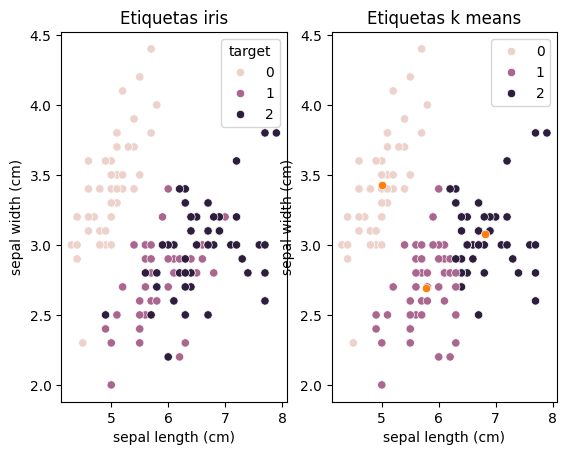

In [294]:
fig, axes = plt.subplots(1, 2)
sns.scatterplot(x, x = 'sepal length (cm)', y = 'sepal width (cm)', hue = y, ax=axes[0]).set(title="Etiquetas iris")
sns.scatterplot(x, x = 'sepal length (cm)', y = 'sepal width (cm)', hue = labels2, ax=axes[1]).set(title="Etiquetas k means")
sns.scatterplot(x = centroid[:, 0], y = centroid[:, 1], ax=axes[1])

Podemos calcular el porcentaje de aciertos

In [295]:
(y==labels2).sum()/len(labels2)*100

82.0

Intenta aplicar la misma idea a los datos de insurance.csv, usando la edad y el precio del seguro.
Para obtener buenos resultados hay que usar poner las dos columnas en la misma escalar.[texto del enlace]
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

Opcion fina para normalizar: MinMaxScaler
scaler.fit(data)
scaler.transform(data)

In [296]:
# google colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [297]:
path = "/content/drive/My Drive/Clara del Rey/BIG DATA/Programacion/FTP/000 Datos/"
seguros = pd.read_csv(path + "insurance.csv", sep = ",")
seguros.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<Axes: title={'center': 'Etiquetas Seguros K-Means'}, xlabel='age', ylabel='charges'>

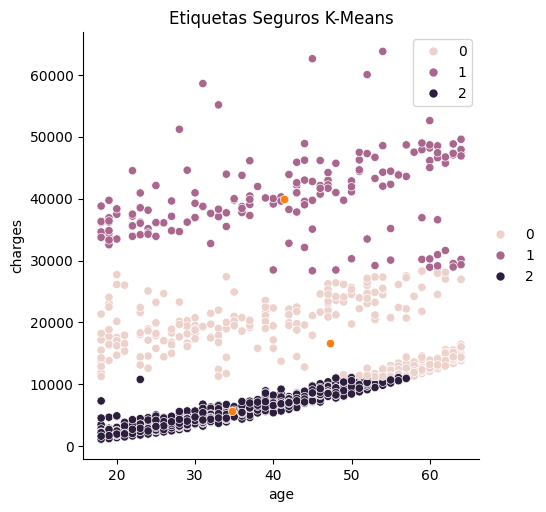

In [298]:
seguros = seguros[['age', 'charges']]
centroid, labels, inertia = k_means(seguros, 3, random_state=0)

sns.relplot(seguros, x = 'age', y = 'charges', hue = labels).set(title="Etiquetas Seguros K-Means")
sns.scatterplot(x = centroid[:, 0], y = centroid[:, 1])

In [299]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# print(scaler.fit(x))
# print(scaler.transform(x))

In [300]:
scaler.fit(seguros)
transformado = scaler.transform(seguros)

transformado = pd.DataFrame(transformado, columns = ['age', 'charges'])
centroid, labels, inertia = k_means(transformado, 3, random_state=0)

In [302]:
transformado.head()

,age,charges
0,0.021739,0.251611
1,0.000000,0.009636
2,0.217391,0.053115
3,0.326087,0.333010
4,0.304348,0.043816


<Axes: title={'center': 'Etiquetas Seguros K-Means'}, xlabel='age', ylabel='charges'>

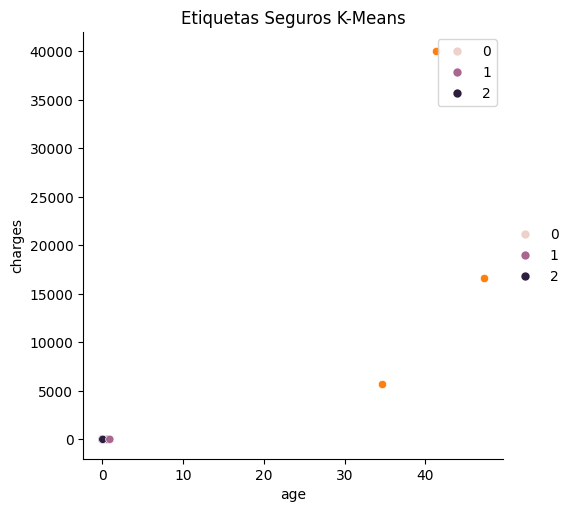

In [301]:
sns.relplot(transformado, x = 'age', y = 'charges', hue = labels).set(title="Etiquetas Seguros K-Means")
sns.scatterplot(x = centroid[:, 0], y = centroid[:, 1])